## Medical Data Visualizer

In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("medical_examination.csv")
df.head(10)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


## Tasks

Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

Use the data to complete the following tasks in medical_data_visualizer.py:

- Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [3]:
# first we calculate the bmi
df['BMI'] = (df['weight']/(df['height']/100)**2).round(1)

# them calculate the overweight
df['overweight'] = np.where(df['BMI'] > 25, 1, 0)
#df.loc[df['BMI'] > 25, 'overweight'] = 1
#df.loc[df['BMI'] <= 25, 'overweight'] = 0

df.head(10)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.9,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.5,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.7,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,29.4,1
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,37.7,1
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,30.0,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,28.4,1
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,25.3,1


- Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [4]:
df['cholesterol'] = np.where(df['cholesterol'] == 1, 0, 1)
df['gluc'] = np.where(df['gluc'] == 1, 0, 1)

df.head(10)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,22.0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.9,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.5,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.7,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.0,0
5,8,21914,1,151,67.0,120,80,1,1,0,0,0,0,29.4,1
6,9,22113,1,157,93.0,130,80,1,0,0,0,1,0,37.7,1
7,12,22584,2,178,95.0,130,90,1,1,0,0,1,1,30.0,1
8,13,17668,1,158,71.0,110,70,0,0,0,0,1,0,28.4,1
9,14,19834,1,164,68.0,110,60,0,0,0,0,0,0,25.3,1


- Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.

In [5]:
#creating charts
cardio1 = df[df['cardio'] == 1]
cardio0 = df[df['cardio'] == 0]
df.columns

Index(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'BMI', 'overweight'],
      dtype='object')

In [6]:
#graphing
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
df_cat


,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


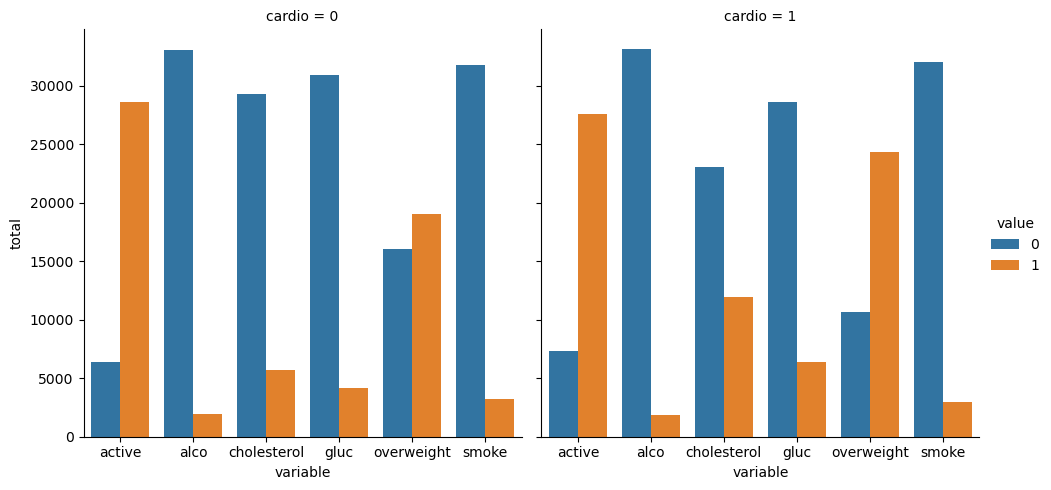

In [7]:
g = sns.catplot(data=df_cat, kind='count', x='variable', hue='value', col='cardio')
g.set_axis_labels('variable', 'total')
plt.show()

- Clean the data. Filter out the following patient segments that represent incorrect data:

    - diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
    - height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    - height is more than the 97.5th percentile
    - weight is less than the 2.5th percentile
    - weight is more than the 97.5th percentile


In [13]:
df = df[df['ap_lo'] <= df['ap_hi'] 
        & (df['height'] >= df['height'].quantile(0.025))
        & (df['height'] <= df['height'].quantile(0.975))
        & (df['weight'] >= df['weight'].quantile(0.025))
        & (df['weight'] <= df['weight'].quantile(0.975))]
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
2014,2845,22712,2,167,59.0,906,0,0,0,0,0,1,0,21.2,0
13489,19258,14965,2,150,60.0,130,0,0,0,0,0,0,0,26.7,1
16459,23512,20457,1,156,50.0,138,0,1,0,0,0,1,1,20.5,0
17381,24837,18226,1,164,78.0,138,0,0,0,0,0,1,0,29.0,1
22923,32749,21182,2,166,68.0,149,0,0,0,0,0,1,1,24.7,0
23867,34120,16131,1,161,92.0,906,0,1,0,0,0,1,1,35.5,1
25454,36325,17952,2,176,73.0,12,0,0,0,0,0,1,0,23.6,0
27686,39577,23396,2,180,73.0,140,0,0,0,1,1,1,1,22.5,0
31783,45400,16070,1,170,64.0,907,0,0,0,0,0,1,0,22.1,0
38370,54780,23208,2,170,81.0,148,0,0,0,0,0,1,0,28.0,1


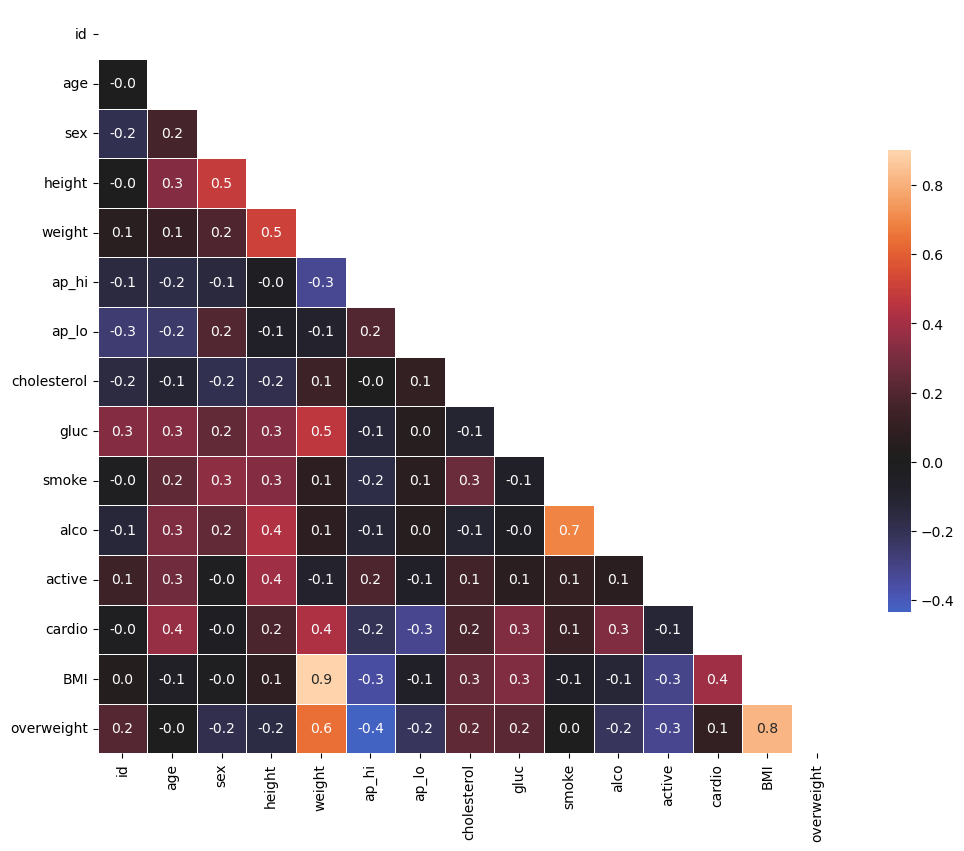

In [18]:
corr = df.corr()
mask = np.triu(corr)
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, annot=True, fmt='.1f', center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, mask=mask)
plt.savefig('heatmap.png')
plt.show()